In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [4]:


# Replace 'your_file.csv' with the actual file path
file_path = 'C:/Users/Ankit/Downloads/Project/source/all_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0       6.0       143347.0               47.0                    60.0   
1       6.0        50905.0                1.0                     1.0   
2       6.0       143899.0               46.0                    58.0   
3      17.0          313.0                2.0                     2.0   
4       6.0       142605.0               45.0                    58.0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                    1325.0                  108751.0                  570.0   
1                       0.0                       0.0                    0.0   
2                    1325.0                  110185.0                  570.0   
3                      90.0                     206.0                   45.0   
4                    1325.0                  108751.0                  570.0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \


In [7]:
# Sample data (replace this with your actual data)
# features: X_data (n_samples x n_features)
# labels: y_labels (n_samples,)
X_data = df[['Idle Max', 'Init Bwd Win Bytes', 'Fwd Header Length', 'Fwd Packet Length Std', 'Bwd Packet Length Std', 'Fwd IAT Min', 'Avg Packet Size']]
y_labels = df['Label']

In [11]:
unique_values = y_labels.unique()
unique_count = y_labels.nunique()
print("Unique values in the 'Label' column:")
print(unique_values)
print(unique_count)

Unique values in the 'Label' column:
['Benign' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack – Brute Force' 'Web Attack – XSS'
 'Web Attack – Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
15


In [12]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y_labels_encoded = label_encoder.fit_transform(y_labels)

In [16]:
unique_values = np.unique(y_labels_encoded)
num_unique = len(unique_values)

print("Unique values:", unique_values)
print("Number of unique values:", num_unique)

Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Number of unique values: 15


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels_encoded, test_size=0.2, random_state=42)

In [18]:
# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(7,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')  # 15 classes for output
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/5
44672/44672 [==============================] - 70s 2ms/step - loss: 5339.1177 - accuracy: 0.8794 - val_loss: 0.3579 - val_accuracy: 0.8871
Epoch 2/5
44672/44672 [==============================] - 66s 1ms/step - loss: 16.0989 - accuracy: 0.8874 - val_loss: 1.3991 - val_accuracy: 0.8870
Epoch 3/5
44672/44672 [==============================] - 63s 1ms/step - loss: 408.2486 - accuracy: 0.8879 - val_loss: 0.3615 - val_accuracy: 0.8871
Epoch 4/5
44672/44672 [==============================] - 61s 1ms/step - loss: 9.2992 - accuracy: 0.8875 - val_loss: 0.3678 - val_accuracy: 0.8871
Epoch 5/5
13960/13960 [==============================] - 13s 960us/step - loss: 0.3658 - accuracy: 0.8899
Test Accuracy: 0.8899228572845459


In [20]:
from sklearn.metrics import roc_curve, auc, f1_score, classification_report
import matplotlib.pyplot as plt

In [21]:
y_pred_probs = model.predict(X_test)

13960/13960 [==============================] - 10s 733us/step


In [23]:
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ValueError: multiclass format is not supported

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [25]:
# Load your dataset
# Assuming you have a CSV file named 'network_data.csv'
data = pd.read_csv('C:/Users/Ankit/Downloads/Project/source/all_data.csv')

In [26]:
# Separate features and labels
X = data[['Idle Max', 'Init Bwd Win Bytes', 'Fwd Header Length', 'Fwd Packet Length Std', 
          'Bwd Packet Length Std', 'Fwd IAT Min', 'Avg Packet Size']]
y = data['Label']


In [27]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [29]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Convert labels to one-hot encoded format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [31]:
# Build the neural network model (same as before)
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(15, activation='softmax')
])

In [32]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
44672/44672 [==============================] - 57s 1ms/step - loss: 0.1652 - accuracy: 0.9600 - val_loss: 0.1330 - val_accuracy: 0.9643
Epoch 2/10
44672/44672 [==============================] - 63s 1ms/step - loss: 0.1341 - accuracy: 0.9637 - val_loss: 0.1216 - val_accuracy: 0.9658
Epoch 3/10
44672/44672 [==============================] - 64s 1ms/step - loss: 0.1241 - accuracy: 0.9646 - val_loss: 0.1068 - val_accuracy: 0.9668
Epoch 4/10
44672/44672 [==============================] - 66s 1ms/step - loss: 0.1205 - accuracy: 0.9650 - val_loss: 0.1085 - val_accuracy: 0.9669
Epoch 5/10
44672/44672 [==============================] - 76s 2ms/step - loss: 0.1184 - accuracy: 0.9653 - val_loss: 0.1049 - val_accuracy: 0.9671
Epoch 6/10
44672/44672 [==============================] - 68s 2ms/step - loss: 0.1175 - accuracy: 0.9656 - val_loss: 0.1040 - val_accuracy: 0.9665
Epoch 7/10
44672/44672 [==============================] - 72s 2ms/step - loss: 0.1165 - accuracy: 0.9658 - val_loss: 0

In [33]:
# Predict probabilities for test set
y_pred_probs = model.predict(X_test_scaled)

13960/13960 [==============================] - 10s 739us/step


In [34]:
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

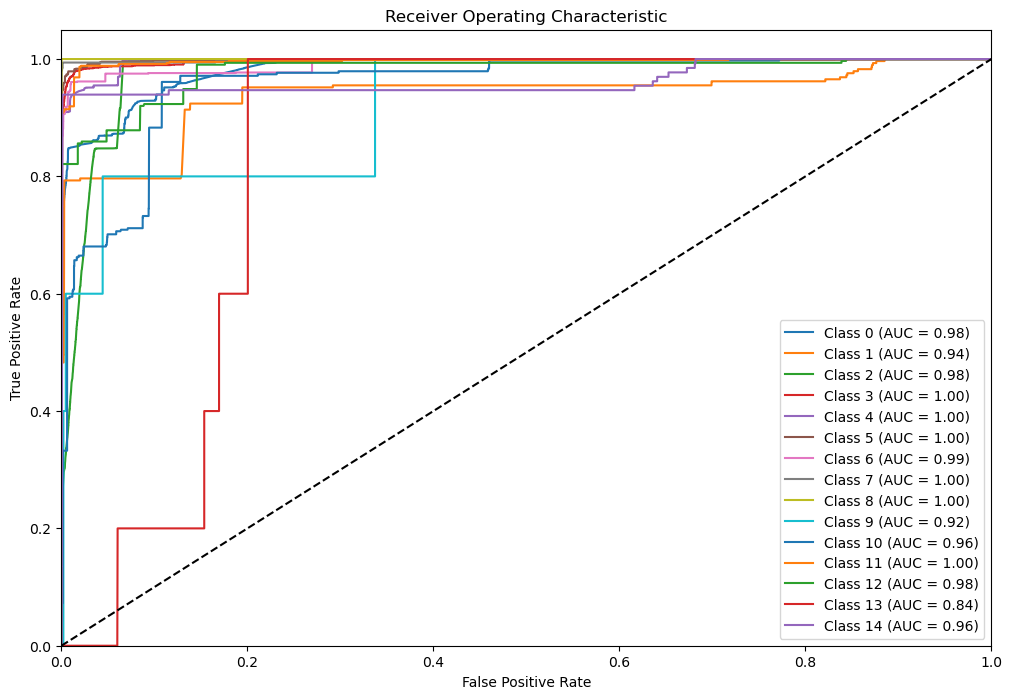

In [35]:
# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Calculate and print the micro-average F1 score
y_pred_labels = np.argmax(y_pred_probs, axis=1)
micro_f1 = f1_score(y_test, y_pred_labels, average='micro')
print("Micro-Average F1 Score:", micro_f1)


Micro-Average F1 Score: 0.9682615722811463


In [37]:
# Calculate and print the classification report
y_pred_classes = np.argmax(y_pred_probs, axis=1)
class_names = label_encoder.classes_
classification_rep = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", classification_rep)

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                             precision    recall  f1-score   support

                    Benign       0.97      1.00      0.98    396905
                       Bot       0.00      0.00      0.00       290
                      DDoS       0.87      0.24      0.38      8363
             DoS GoldenEye       0.84      0.79      0.82      2036
                  DoS Hulk       1.00      0.90      0.95     34349
          DoS Slowhttptest       0.86      0.80      0.83      1097
             DoS slowloris       0.86      0.40      0.55      1047
               FTP-Patator       0.00      0.00      0.00      1177
                Heartbleed       0.00      0.00      0.00         2
              Infiltration       0.00      0.00      0.00         5
                  PortScan       0.00      0.00      0.00       385
               SSH-Patator       0.88      0.90      0.89       608
  Web Attack – Brute Force       0.00      0.00      0.00       313
Web Attack – Sql Inject

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
